### Large size in hypotheses testing

When we increase our sample size, even the smallest of differences may seem significant.So we can say large smaple size influence to lead to all result being statistically significant,but not useful for hypotheses testing

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60. 

$$H_0: \mu\ = 67.60$$


$$H_1: \mu\neq 67.60$$     

`2.` Find:
* What is the population mean height and standard deviation

In [5]:
print(full_data.height.mean())
print(full_data.height.std())

67.59748697307937
3.119433206550344


* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 

In [6]:
sample1 = full_data.sample(5)
# 5 sampling data 

In [7]:
sample_size5 = []

for _ in range(10000): 
    bootsample = sample1.sample(5,replace=True)
    mean_bootsample = bootsample.height.mean()
    sample_size5.append(mean_bootsample)
#bootstrape 5 sampling data 

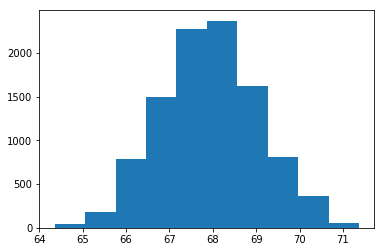

In [8]:
plt.hist(sample_size5);
# build a distribution with above list 

* What is the standard deviation of the sampling distribution of the mean of **five draws?** 

In [9]:
np.std(sample_size5)

1.141357351999374

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  

 #### Null distribution with 5 sample mean axis 

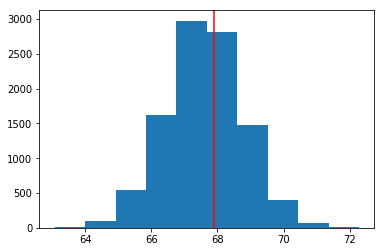

In [8]:
null_vals = np.random.normal(67.60,np.std(sample_size5),10000)   #null-mean = 67.60 (mean of null distribution)
plt.hist(null_vals)
plt.axvline(x=sample1.height.mean(),color='red')  
plt.show()

#### Calculating P-value (5 sample)

In [9]:
sample1.height.mean()

67.88234252049084

In [10]:
prob_more_extreme_high = (null_vals > sample1.height.mean()).mean()
prob_more_extreme_low =  (null_vals < 67.60  - (sample1.height.mean()-67.60)).mean()  
p_value = prob_more_extreme_high+prob_more_extreme_low ; p_value

0.8049999999999999

**Confidence Interval (5 sample)**

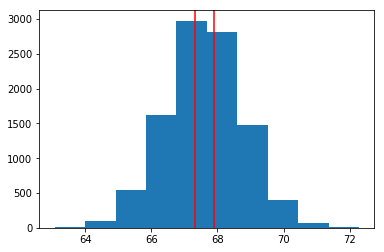

In [11]:
upper = sample1.height.mean()
low = 67.60 - (sample1.height.mean() - 67.60)

plt.hist(null_vals);
plt.axvline(x=low,color='red')
plt.axvline(x=upper,color='red')
plt.show()

`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of **300**.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

In [12]:
sample300 = full_data.sample(300)

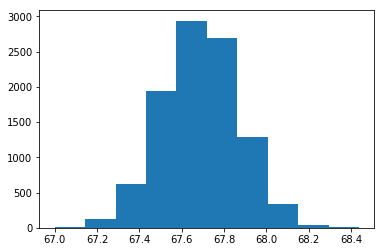

In [13]:
sample_size300 = []

for _ in range(10000): 
    bootsample = sample300.sample(300,replace=True)
    mean_bootsample = bootsample.height.mean()
    sample_size300.append(mean_bootsample)

plt.hist(sample_size300);

In [14]:
np.std(sample_size300)

0.1810848597411894

 #### Null distribution with 300 sample mean axis 

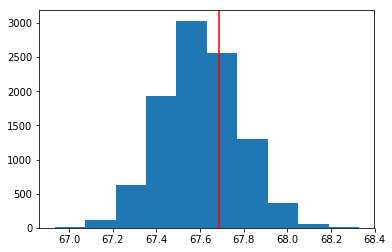

In [15]:
null_vals = np.random.normal(67.60,np.std(sample_size300),10000)   #null-mean = 67.60 
plt.hist(null_vals)
plt.axvline(x=sample300.height.mean(),color='red')  
plt.show()

**Calculating P-value (300 sample)**

In [16]:
sample300.height.mean()

67.6887679510389

In [17]:
prob_more_extreme_high = (null_vals > sample300.height.mean()).mean()
prob_more_extreme_low =  (null_vals < 67.60  - (sample300.height.mean()-67.60)).mean()  
p_value = prob_more_extreme_high+prob_more_extreme_low ; p_value

0.6137

**Confidence Interval (300 sample)**

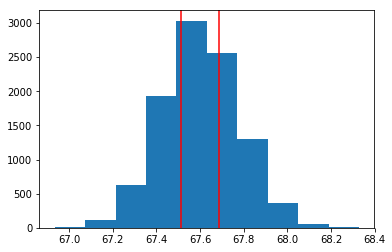

In [18]:
upper = sample300.height.mean()
low = 67.60 - (sample300.height.mean() - 67.60)

plt.hist(null_vals);
plt.axvline(x=low,color='red')
plt.axvline(x=upper,color='red')
plt.show()